In [ ]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

import numpy as np # уже знакомые нам библиотеки
import pandas as pd

from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
register_matplotlib_converters() 

import seaborn as sns # наводим красоту
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

### Упражнение 1

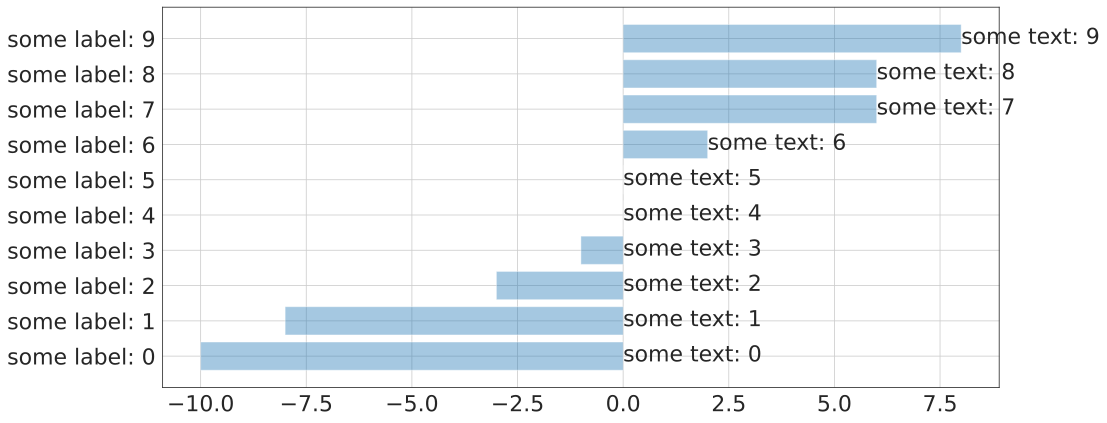

In [ ]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    y = [i for i in range(10)]
    
    plt.figure(figsize=figsize)

    ax = plt.gca()
    ax.grid(True)
    ax.barh(y, bars_length, label=labels, alpha=0.4,
            tick_label=yticks_labels)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(22) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(22) 
    
    for i in y:
        x = bars_length[i]
        if x < 0:
            x = 0
        plt.annotate(labels[i], xy=(x, i-0.15), fontsize=22)

    plt.show()

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (15 , 7)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

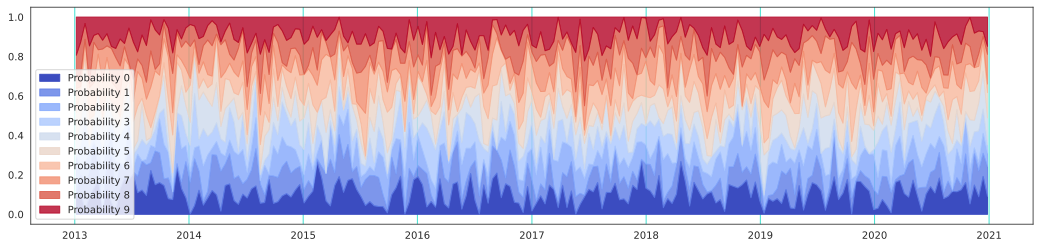

In [ ]:
def plot_time_probabilities(df, figsize):
    plt.figure(figsize=figsize)
    y1 = df[0]
    cmap = plt.cm.coolwarm
    color = cmap(0)
    plt.fill_between(df.index, y1, color=color)
    for i in range(1, 10):
        y2 = y1 + df[i]
        #plt.plot(y1)
        color = cmap(float(i) / float(9)) 
        plt.fill_between(df.index, y1, y2, color=color, alpha=0.8)
        y1 = y2
    plt.legend(['Probability {}'.format(i) for i in df.columns], loc='lower left')
    plt.grid(True, axis='x', color='turquoise', lw=1)
    plt.show

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (18 , 4)

plot_time_probabilities(probabilities_in_time, figsize)